# MCMC Model Visual Diagnostics

In this section, we will introduce a suite of diagnostic plots in Orbit

- Density histogram
- Trace plot
- Pair plot

In this tutorial, we want to demonstrate how to use the plotting utilities to diagnose Orbit MCMC models. Those could be very useful in practice when checking the convergence of MCMC.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import orbit
from orbit.models.dlt import DLTMAP, DLTAggregated, DLTFull
from orbit.diagnostics.plot import plot_posterior_params
from orbit.utils.dataset import load_iclaims

import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn')

In [2]:
assert orbit.__version__ == '1.0.12'

In [10]:
# load log-transformed data
df = load_iclaims()
test_size = 52
train_df = df[:-test_size]
test_df = df[-test_size:]

response_col = 'claims'
date_col = 'week'
regressor_col = ['trend.unemploy', 'trend.filling', 'trend.job']

## Fit a Model

Before we show the diagnostic tool, we will fit a DLT model using the iclaims data.

In [11]:
dlt_mcmc = DLTFull(
    response_col=response_col,
    date_col=date_col,
    regressor_col=regressor_col,
    regressor_sign=["+", '+', '='], 
    seasonality=52,
)

Do the model training.

In [12]:
dlt_mcmc.fit(df=train_df)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


## Posterior Diagnostic Visualizations

`plot_posterior_params` is the main utility for different kinds of diagnostic plots.

### Density/Histogram

By setting `kind = 'density'`, we get posterior paramter density plot. It shows the mean, median and confidence Interval (95% by default) of various paramter posterior samples. One can specify a path string (e.g., './density.png') to save the chart.

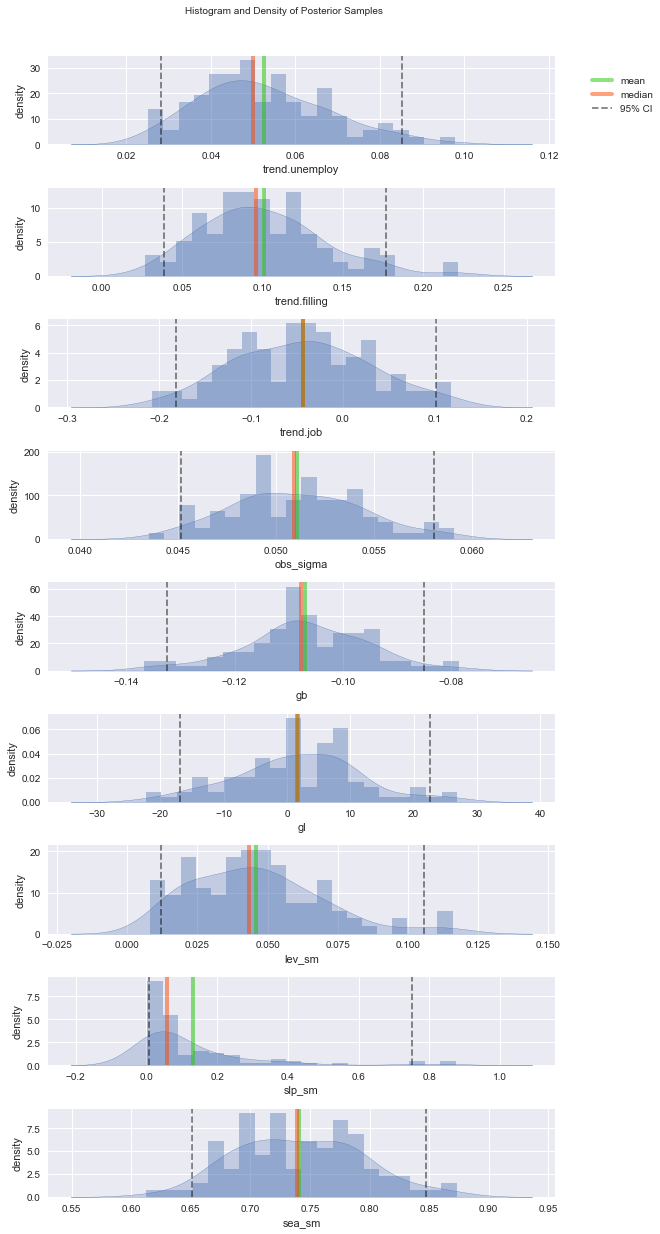

In [13]:
_ = plot_posterior_params(dlt_mcmc, kind='density',
                          incl_trend_params=True, incl_smooth_params=True)

### Trace plot

Trace plot shows the iterations of each paramter over the Markov chian sampling process. Trace plots provide an important tool for assessing mixing of a chain.

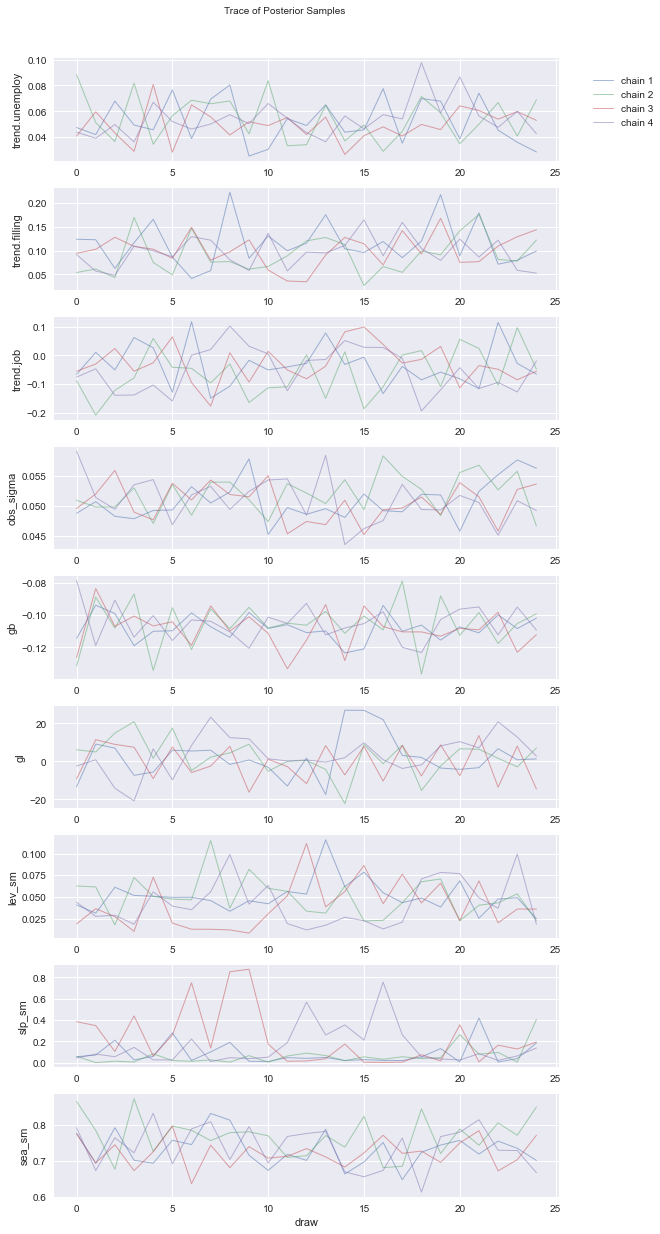

In [14]:
_ = plot_posterior_params(dlt_mcmc, kind='trace',
                          incl_trend_params=True, incl_smooth_params=True)

### pair plot
By setting `kind = 'pair'`, it will generates a series of pair plots, which depict the relationship between every two parameters.

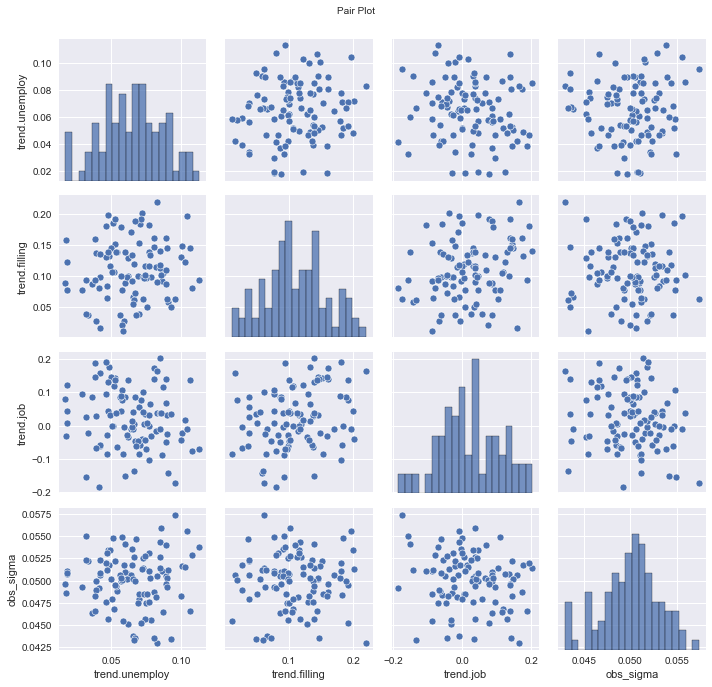

In [8]:
_ = plot_posterior_params(dlt_mcmc, kind='pair', pair_type='scatter', 
                          incl_trend_params=False, incl_smooth_params=False)

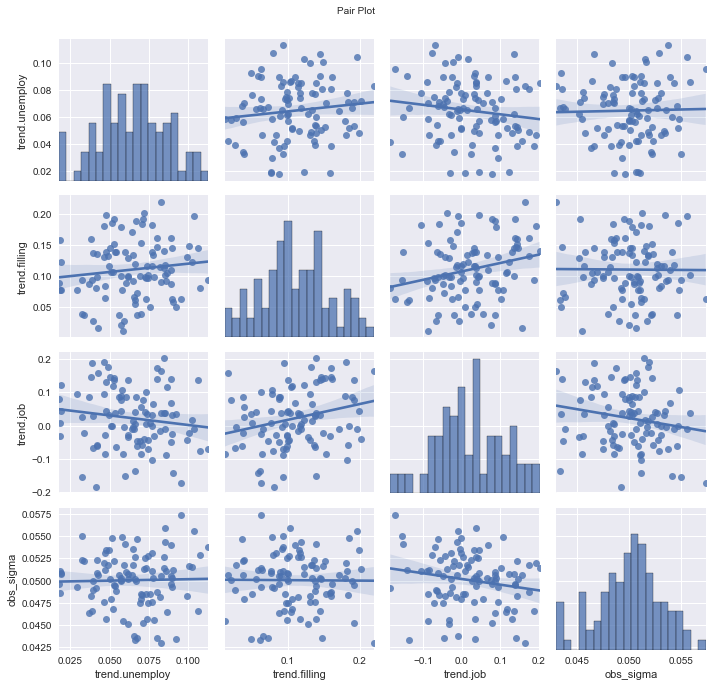

In [9]:
_ = plot_posterior_params(dlt_mcmc, kind='pair', pair_type='reg', 
                          incl_trend_params=False, incl_smooth_params=False)